In [12]:
from transformers import AutoImageProcessor, ViTForImageClassification
import torch
from PIL import Image

# Load image
image = Image.open("/content/sample_dog.jpeg").convert("RGB")
# resize to 224x224
image = image.resize((224, 224))
# Load processor
processor = AutoImageProcessor.from_pretrained("facebook/deit-small-patch16-224")

# Load model with eager attention implementation
model = ViTForImageClassification.from_pretrained(
    "facebook/deit-small-patch16-224",
    attn_implementation="eager"
)

# Prepare input
inputs = processor(images=image, return_tensors="pt")

# Forward pass requesting attentions
outputs = model(**inputs, output_attentions=True, return_dict=True)
attentions = outputs.attentions

# Check attentions
print(attentions)  # Should now contain valid attention tensors instead of None


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/88.3M [00:00<?, ?B/s]

(tensor([[[[2.6642e-01, 5.5378e-03, 4.8652e-03,  ..., 4.7070e-03,
           4.6061e-03, 5.4420e-03],
          [3.2359e-01, 1.2045e-02, 1.1028e-02,  ..., 2.1579e-03,
           2.3199e-03, 3.3222e-03],
          [3.0169e-01, 1.3042e-02, 1.2592e-02,  ..., 2.0429e-03,
           2.1986e-03, 3.0834e-03],
          ...,
          [4.4790e-01, 3.5315e-03, 2.8615e-03,  ..., 9.5048e-03,
           8.7898e-03, 9.1021e-03],
          [4.4712e-01, 4.0463e-03, 3.3035e-03,  ..., 8.0942e-03,
           9.8626e-03, 8.5145e-03],
          [4.5820e-01, 4.3069e-03, 3.4557e-03,  ..., 6.8245e-03,
           7.1893e-03, 9.0080e-03]],

         [[8.7664e-01, 7.5814e-04, 5.7318e-04,  ..., 5.7521e-04,
           4.9206e-04, 6.3694e-04],
          [9.0681e-02, 1.6199e-02, 2.1553e-02,  ..., 2.1751e-03,
           2.6027e-03, 2.4148e-03],
          [8.6627e-02, 2.1373e-02, 1.7808e-02,  ..., 1.5677e-03,
           1.9235e-03, 2.7830e-03],
          ...,
          [2.0164e-01, 4.5266e-03, 3.6487e-03,  ..., 2.403

In [13]:
last_attn = attentions[-1]  # shape: [1, num_heads, 197, 197]
# CLS token is index 0; we want its attention to all other tokens (1 to 196)
cls_attn = last_attn[0, :, 0, 1:]  # shape: [num_heads, 196]

In [14]:
last_attn.shape

torch.Size([1, 6, 197, 197])

In [16]:
mean_attn = cls_attn.mean(dim=0)  # shape: [196]

In [17]:
mean_attn.shape

torch.Size([196])

In [18]:
mean_attn

tensor([1.6450e-04, 7.8224e-03, 1.6063e-04, 9.6033e-05, 9.5392e-05, 9.6935e-05,
        8.4646e-05, 1.1668e-04, 8.9054e-05, 1.0283e-04, 1.6172e-04, 1.7276e-04,
        2.3730e-02, 1.7065e-04, 1.4667e-04, 3.9749e-02, 1.1059e-04, 5.9603e-04,
        9.8457e-05, 1.0832e-03, 3.2569e-02, 1.8563e-02, 1.2724e-02, 9.2057e-05,
        1.3941e-04, 6.5072e-05, 1.5881e-02, 1.9708e-04, 1.3301e-04, 1.6609e-03,
        2.2257e-03, 6.7790e-05, 6.9722e-03, 5.7967e-05, 7.4329e-05, 2.8306e-04,
        1.1184e-04, 1.0671e-03, 2.0764e-03, 6.7515e-05, 9.7824e-05, 1.3455e-04,
        5.3474e-02, 1.7658e-02, 1.6399e-02, 1.7743e-03, 1.1459e-02, 5.4892e-03,
        8.8702e-05, 1.1413e-04, 5.6301e-03, 1.2084e-02, 6.9609e-05, 3.1651e-04,
        1.0741e-02, 1.4927e-04, 1.8604e-04, 4.0716e-04, 6.2877e-04, 1.8546e-03,
        3.2490e-04, 3.1725e-04, 2.9565e-04, 4.0575e-03, 1.0264e-02, 1.8445e-02,
        1.8657e-02, 3.6205e-04, 4.0587e-04, 2.0661e-03, 9.5344e-04, 7.9773e-04,
        6.1201e-04, 1.1708e-03, 6.6313e-

In [19]:
import math

patch_dim = int(math.sqrt(mean_attn.numel()))  # should yield 14
attn_map = mean_attn.reshape(patch_dim, patch_dim).detach().cpu().numpy()

In [20]:
patch_dim

14

In [22]:
attn_map.shape

(14, 14)

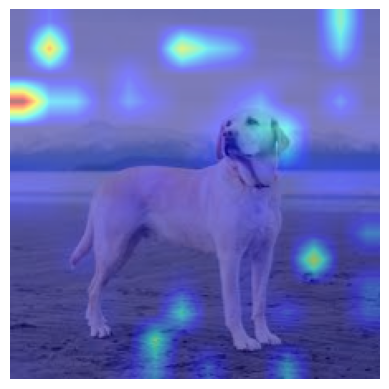

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Ensure the original image is 224×224
img_resized = image.resize((224, 224))

# Upsample attention map to image size
attn_resized = Image.fromarray(attn_map).resize((224, 224), resample=Image.BILINEAR)
attn_norm = np.array(attn_resized)
attn_norm = (attn_norm - attn_norm.min()) / (attn_norm.max() - attn_norm.min())

plt.imshow(img_resized)
plt.imshow(attn_norm, cmap="jet", alpha=0.5)
plt.axis("off")
plt.show()


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Original Image:


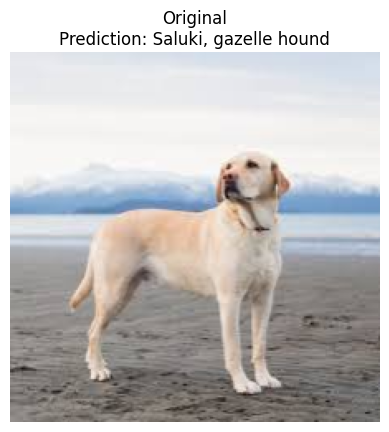

Random Masked (30% patches):


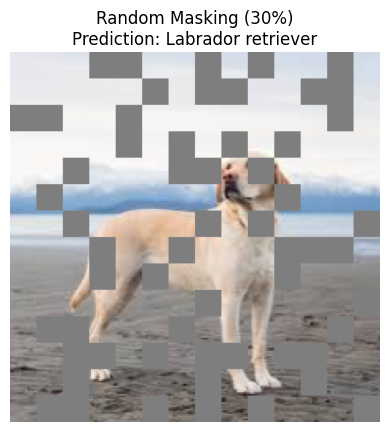

Center Masked (64x64 pixels):


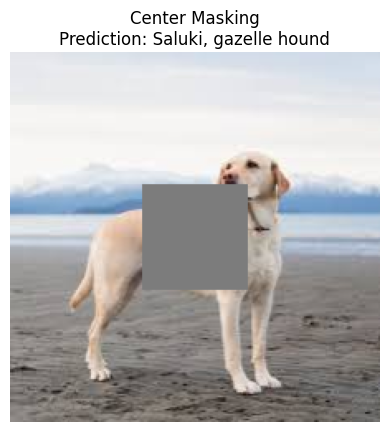

'Saluki, gazelle hound'

In [ ]:
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt
from transformers import AutoImageProcessor, ViTForImageClassification

# -----------------------------
# 1. Load model + image
# -----------------------------
image = Image.open("/content/sample_dog.jpeg").convert("RGB")
processor = AutoImageProcessor.from_pretrained("facebook/deit-small-patch16-224")
model = ViTForImageClassification.from_pretrained("facebook/deit-small-patch16-224")

# Prepare input
inputs = processor(images=image, return_tensors="pt")

# -----------------------------
# 2. Helper functions for masking
# -----------------------------
def mask_random_patches(inputs, mask_ratio=0.3, patch_size=16):
    pixel_values = inputs["pixel_values"].clone()  # shape: [1, 3, 224, 224]
    _, _, H, W = pixel_values.shape
    num_patches = (H // patch_size) * (W // patch_size)

    # Choose random patches
    num_mask = int(mask_ratio * num_patches)
    mask_indices = np.random.choice(num_patches, num_mask, replace=False)

    for idx in mask_indices:
        row = (idx // (W // patch_size)) * patch_size
        col = (idx % (W // patch_size)) * patch_size
        pixel_values[:, :, row:row+patch_size, col:col+patch_size] = 0  # black patch

    return {"pixel_values": pixel_values}

def mask_center_patch(inputs, patch_size=16, mask_size=64):
    pixel_values = inputs["pixel_values"].clone()
    _, _, H, W = pixel_values.shape

    # Center square
    row_start, row_end = H//2 - mask_size//2, H//2 + mask_size//2
    col_start, col_end = W//2 - mask_size//2, W//2 + mask_size//2

    pixel_values[:, :, row_start:row_end, col_start:col_end] = 0
    return {"pixel_values": pixel_values}

# -----------------------------
# 3. Run inference + visualize
# -----------------------------
def predict_and_show(inputs, title):
    outputs = model(**inputs)
    pred_id = torch.argmax(outputs.logits, dim=-1).item()
    label = model.config.id2label[pred_id]

    # Convert tensor back to image
    img = inputs["pixel_values"][0].permute(1, 2, 0).detach().cpu().numpy()
    img = (img - img.min()) / (img.max() - img.min())  # normalize to [0,1]

    plt.imshow(img)
    plt.title(f"{title}\nPrediction: {label}")
    plt.axis("off")
    plt.show()
    return label

# -----------------------------
# 4. Compare cases
# -----------------------------
print("Original Image:")
predict_and_show(inputs, "Original")

print("Random Masked (30% patches):")
masked_random = mask_random_patches(inputs, mask_ratio=0.3)
predict_and_show(masked_random, "Random Masking (30%)")

print("Center Masked (64x64 pixels):")
masked_center = mask_center_patch(inputs, mask_size=64)
predict_and_show(masked_center, "Center Masking")


In [ ]:
# -----------------------------
# Step 1: Install dependencies (run once)
# -----------------------------
# !pip install datasets transformers scikit-learn

import torch
import numpy as np
from datasets import load_dataset
from transformers import ViTModel, AutoImageProcessor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# -----------------------------
# Step 2: Load CIFAR-10 dataset
# -----------------------------
dataset = load_dataset("cifar10")
train_data = dataset["train"].select(range(2000))  # small subset for speed
test_data = dataset["test"].select(range(500))

# -----------------------------
# Step 3: Load pretrained ViT
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
vit = ViTModel.from_pretrained("google/vit-base-patch16-224").to(device)
vit.eval()

# -----------------------------
# Step 4: Feature extraction
# -----------------------------
def extract_features(data, pooling="cls"):
    feats, labels = [], []
    for example in data:
        image, label = example["img"], example["label"]
        inputs = processor(image, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = vit(**inputs)
            last_hidden = outputs.last_hidden_state

            if pooling == "cls":
                emb = last_hidden[:, 0, :]  # CLS token
            elif pooling == "mean":
                emb = last_hidden[:, 1:, :].mean(dim=1)  # mean of patch tokens

        feats.append(emb.cpu().numpy())
        labels.append(label)

    return np.vstack(feats), np.array(labels)

# -----------------------------
# Step 5: Extract features
# -----------------------------
X_train_cls, y_train = extract_features(train_data, pooling="cls")
X_test_cls, y_test = extract_features(test_data, pooling="cls")

X_train_mean, _ = extract_features(train_data, pooling="mean")
X_test_mean, _ = extract_features(test_data, pooling="mean")

# -----------------------------
# Step 6: Train linear probes
# -----------------------------
clf_cls = LogisticRegression(max_iter=10).fit(X_train_cls, y_train)
clf_mean = LogisticRegression(max_iter=10).fit(X_train_mean, y_train)

acc_cls = accuracy_score(y_test, clf_cls.predict(X_test_cls))
acc_mean = accuracy_score(y_test, clf_mean.predict(X_test_mean))

print("Linear Probe (CLS token) Accuracy:", acc_cls)
print("Linear Probe (Mean pooling) Accuracy:", acc_mean)


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Linear Probe (CLS token) Accuracy: 0.964
Linear Probe (Mean pooling) Accuracy: 0.964


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Task4

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

from architecture import VAE  # Your provided model

In [3]:
# ----------------------------
# Dataset
# ----------------------------
transform = transforms.Compose([
    transforms.ToTensor()  # keeps pixels in [0,1]
])

dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

100%|██████████| 26.4M/26.4M [00:03<00:00, 7.80MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 177kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.25MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 25.0MB/s]


In [4]:
# Train-validation split
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

In [5]:
# ----------------------------
# Loss Function
# ----------------------------
def vae_loss(recon_x, x, mu, logvar):
    # Reconstruction loss (MSE)
    recon_loss = nn.functional.mse_loss(recon_x, x, reduction="sum")

    # KL Divergence
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return recon_loss + kl_loss, recon_loss, kl_loss

In [6]:
# ----------------------------
# Training Setup
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VAE(latent_dim=20).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 20
train_losses, val_losses = [], []

# ----------------------------
# Training Loop
# ----------------------------
for epoch in range(1, num_epochs + 1):
    # --- Training ---
    model.train()
    train_loss = 0
    for x, _ in train_loader:
        x = x.to(device)
        optimizer.zero_grad()
        recon_x, mu, logvar = model(x)
        loss, recon_loss, kl_loss = vae_loss(recon_x, x, mu, logvar)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader.dataset)

    # --- Validation ---
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, _ in val_loader:
            x = x.to(device)
            recon_x, mu, logvar = model(x)
            loss, _, _ = vae_loss(recon_x, x, mu, logvar)
            val_loss += loss.item()
    val_loss /= len(val_loader.dataset)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")


Epoch [1/20] Train Loss: 38.4504 | Val Loss: 29.1716
Epoch [2/20] Train Loss: 27.3187 | Val Loss: 26.4172
Epoch [3/20] Train Loss: 25.8403 | Val Loss: 25.4971
Epoch [4/20] Train Loss: 25.1868 | Val Loss: 25.0771
Epoch [5/20] Train Loss: 24.7564 | Val Loss: 24.7825
Epoch [6/20] Train Loss: 24.4573 | Val Loss: 24.4829
Epoch [7/20] Train Loss: 24.2436 | Val Loss: 24.4184
Epoch [8/20] Train Loss: 24.0747 | Val Loss: 24.0999
Epoch [9/20] Train Loss: 23.8862 | Val Loss: 23.9942
Epoch [10/20] Train Loss: 23.7634 | Val Loss: 23.9648
Epoch [11/20] Train Loss: 23.6794 | Val Loss: 23.7917
Epoch [12/20] Train Loss: 23.5992 | Val Loss: 23.7459
Epoch [13/20] Train Loss: 23.5296 | Val Loss: 23.7362
Epoch [14/20] Train Loss: 23.4266 | Val Loss: 23.6644
Epoch [15/20] Train Loss: 23.3972 | Val Loss: 23.5998
Epoch [16/20] Train Loss: 23.3338 | Val Loss: 23.6456
Epoch [17/20] Train Loss: 23.2798 | Val Loss: 23.5885
Epoch [18/20] Train Loss: 23.2373 | Val Loss: 23.4771
Epoch [19/20] Train Loss: 23.1830 | V

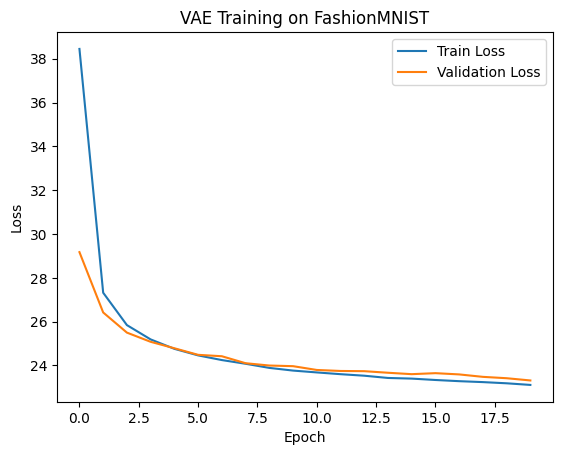

In [7]:
# ----------------------------
# Plot Loss Curve
# ----------------------------
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("VAE Training on FashionMNIST")
plt.show()

###Part 2

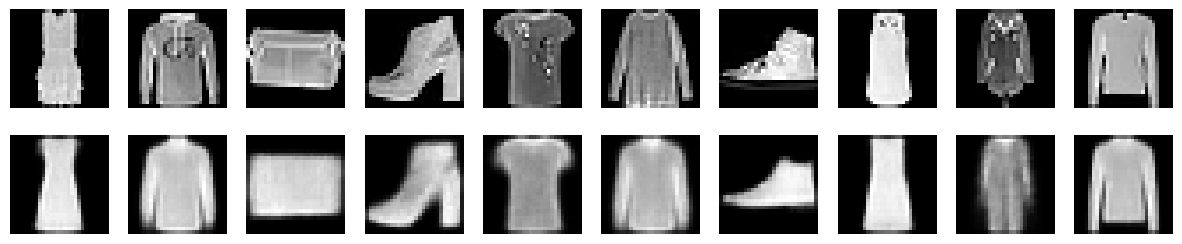

In [8]:
import matplotlib.pyplot as plt

def visualize_reconstructions(model, dataloader, device, n=10):
    model.eval()
    imgs, _ = next(iter(dataloader))  # take a batch
    imgs = imgs.to(device)

    with torch.no_grad():
        recon, mu, logvar = model(imgs)

    # Show originals (top row) and reconstructions (bottom row)
    fig, axes = plt.subplots(2, n, figsize=(n*1.5, 3))
    for i in range(n):
        # Original
        axes[0, i].imshow(imgs[i].cpu().squeeze(), cmap="gray")
        axes[0, i].axis("off")
        # Reconstruction
        axes[1, i].imshow(recon[i].cpu().squeeze(), cmap="gray")
        axes[1, i].axis("off")
    axes[0, 0].set_ylabel("Original", fontsize=12)
    axes[1, 0].set_ylabel("Recon", fontsize=12)
    plt.show()

# Example usage
visualize_reconstructions(model, val_loader, device, n=10)


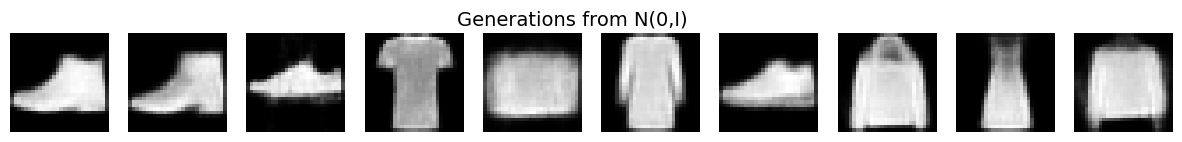

In [9]:
def visualize_generations(model, device, n=10):
    model.eval()
    with torch.no_grad():
        # Sample from standard normal
        z = torch.randn(n, model.fc_mu.out_features).to(device)
        samples = model.decode(z)

    fig, axes = plt.subplots(1, n, figsize=(n*1.5, 1.5))
    for i in range(n):
        axes[i].imshow(samples[i].cpu().squeeze(), cmap="gray")
        axes[i].axis("off")
    plt.suptitle("Generations from N(0,I)", fontsize=14)
    plt.show()

# Example usage
visualize_generations(model, device, n=10)


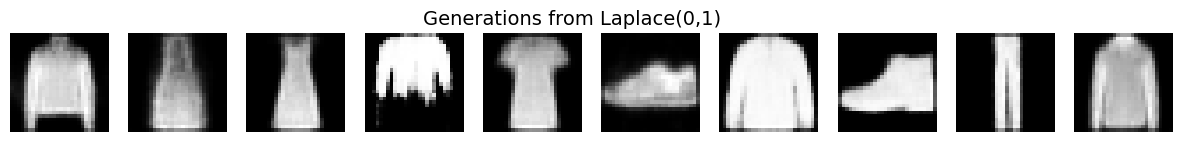

In [10]:
def visualize_laplacian_generations(model, device, n=10):
    model.eval()
    with torch.no_grad():
        # Laplace(0,1) sampling
        laplace = torch.distributions.Laplace(
            loc=torch.zeros(model.fc_mu.out_features),
            scale=torch.ones(model.fc_mu.out_features)
        )
        z = laplace.sample((n,)).to(device)
        samples = model.decode(z)

    fig, axes = plt.subplots(1, n, figsize=(n*1.5, 1.5))
    for i in range(n):
        axes[i].imshow(samples[i].cpu().squeeze(), cmap="gray")
        axes[i].axis("off")
    plt.suptitle("Generations from Laplace(0,1)", fontsize=14)
    plt.show()

# Example usage
visualize_laplacian_generations(model, device, n=10)


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from architecture import VAE

# ----------------------------
# Dataset
# ----------------------------
transform = transforms.ToTensor()
dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

# Train/Val split
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

# ----------------------------
# Loss Function
# ----------------------------
def vae_loss(recon_x, x, mu, logvar):
    recon_loss = nn.functional.mse_loss(recon_x, x, reduction="sum")
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_loss, recon_loss, kl_loss

# ----------------------------
# Setup
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE(latent_dim=20).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 10

# Track losses
train_total_losses, val_total_losses = [], []
train_recon_losses, val_recon_losses = [], []
train_kl_losses, val_kl_losses = [], []

# ----------------------------
# Training Loop
# ----------------------------
for epoch in range(1, num_epochs + 1):
    # --- Training ---
    model.train()
    total_loss, recon_loss_sum, kl_loss_sum = 0, 0, 0
    for x, _ in train_loader:
        x = x.to(device)
        optimizer.zero_grad()
        recon_x, mu, logvar = model(x)
        loss, recon_loss, kl_loss = vae_loss(recon_x, x, mu, logvar)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        recon_loss_sum += recon_loss.item()
        kl_loss_sum += kl_loss.item()
    train_total_losses.append(total_loss / len(train_loader.dataset))
    train_recon_losses.append(recon_loss_sum / len(train_loader.dataset))
    train_kl_losses.append(kl_loss_sum / len(train_loader.dataset))

    # --- Validation ---
    model.eval()
    total_loss, recon_loss_sum, kl_loss_sum = 0, 0, 0
    with torch.no_grad():
        for x, _ in val_loader:
            x = x.to(device)
            recon_x, mu, logvar = model(x)
            loss, recon_loss, kl_loss = vae_loss(recon_x, x, mu, logvar)
            total_loss += loss.item()
            recon_loss_sum += recon_loss.item()
            kl_loss_sum += kl_loss.item()
    val_total_losses.append(total_loss / len(val_loader.dataset))
    val_recon_losses.append(recon_loss_sum / len(val_loader.dataset))
    val_kl_losses.append(kl_loss_sum / len(val_loader.dataset))

    print(f"Epoch [{epoch}/{num_epochs}] "
          f"Train Loss: {train_total_losses[-1]:.4f} "
          f"(Recon: {train_recon_losses[-1]:.4f}, KL: {train_kl_losses[-1]:.4f}) | "
          f"Val Loss: {val_total_losses[-1]:.4f} "
          f"(Recon: {val_recon_losses[-1]:.4f}, KL: {val_kl_losses[-1]:.4f})")


Epoch [1/10] Train Loss: 40.7860 (Recon: 35.2718, KL: 5.5141) | Val Loss: 28.9235 (Recon: 22.2160, KL: 6.7075)
Epoch [2/10] Train Loss: 27.6181 (Recon: 20.8064, KL: 6.8117) | Val Loss: 26.9291 (Recon: 20.3125, KL: 6.6166)
Epoch [3/10] Train Loss: 26.2620 (Recon: 19.2330, KL: 7.0290) | Val Loss: 26.1087 (Recon: 18.9326, KL: 7.1761)
Epoch [4/10] Train Loss: 25.5597 (Recon: 18.3189, KL: 7.2408) | Val Loss: 25.5776 (Recon: 18.3575, KL: 7.2201)
Epoch [5/10] Train Loss: 25.0789 (Recon: 17.7091, KL: 7.3698) | Val Loss: 25.0973 (Recon: 17.7329, KL: 7.3644)
Epoch [6/10] Train Loss: 24.7512 (Recon: 17.3129, KL: 7.4383) | Val Loss: 24.8349 (Recon: 17.2955, KL: 7.5393)
Epoch [7/10] Train Loss: 24.5337 (Recon: 17.0081, KL: 7.5256) | Val Loss: 24.7229 (Recon: 16.9768, KL: 7.7461)
Epoch [8/10] Train Loss: 24.3306 (Recon: 16.7611, KL: 7.5695) | Val Loss: 24.6254 (Recon: 16.6685, KL: 7.9569)
Epoch [9/10] Train Loss: 24.1829 (Recon: 16.5662, KL: 7.6167) | Val Loss: 24.4620 (Recon: 16.6127, KL: 7.8492)
E